<a href="https://colab.research.google.com/github/JALVARADORUIZ/UB_Proyecto/blob/main/TFM_An%C3%A1lisis_Variable_Objetivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TFM_Máster BDDS/datawine/df_clean.csv')

**Precio**

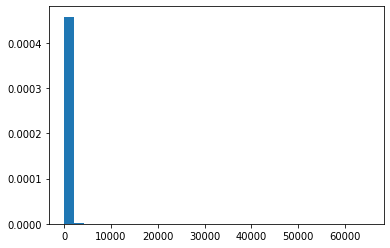

In [ ]:
pd.set_option('display.max_colwidth', None)
plt.hist(df.price_usd, density=True, bins=30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


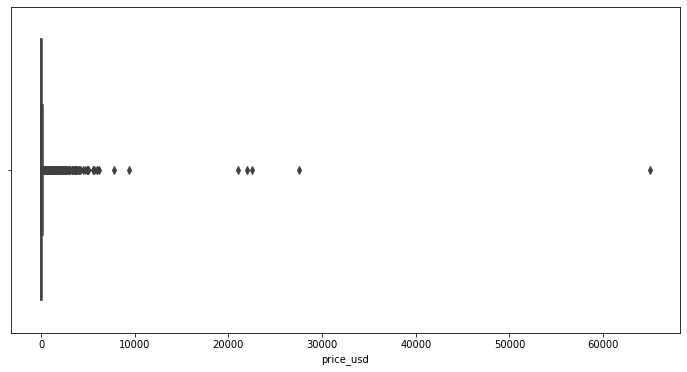

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df['price_usd'])
plt.show()

In [ ]:
IQR = np.quantile(df['price_usd'],0.75) - np.quantile(df['price_usd'],0.25)
lower_range = np.quantile(df['price_usd'],0.25) - 1.5* IQR
upper_range = np.quantile(df['price_usd'],0.75) + 1.5* IQR

print(f'IQR: {IQR}')
print(f'Lower range: {lower_range}')
print(f'Upper range: {upper_range}')

IQR: 84.0
Lower range: -110.01
Upper range: 225.99


*Filtramos outliers*

In [ ]:
df = df[(df.price_usd >=lower_range) & (df.price_usd <= upper_range)]

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


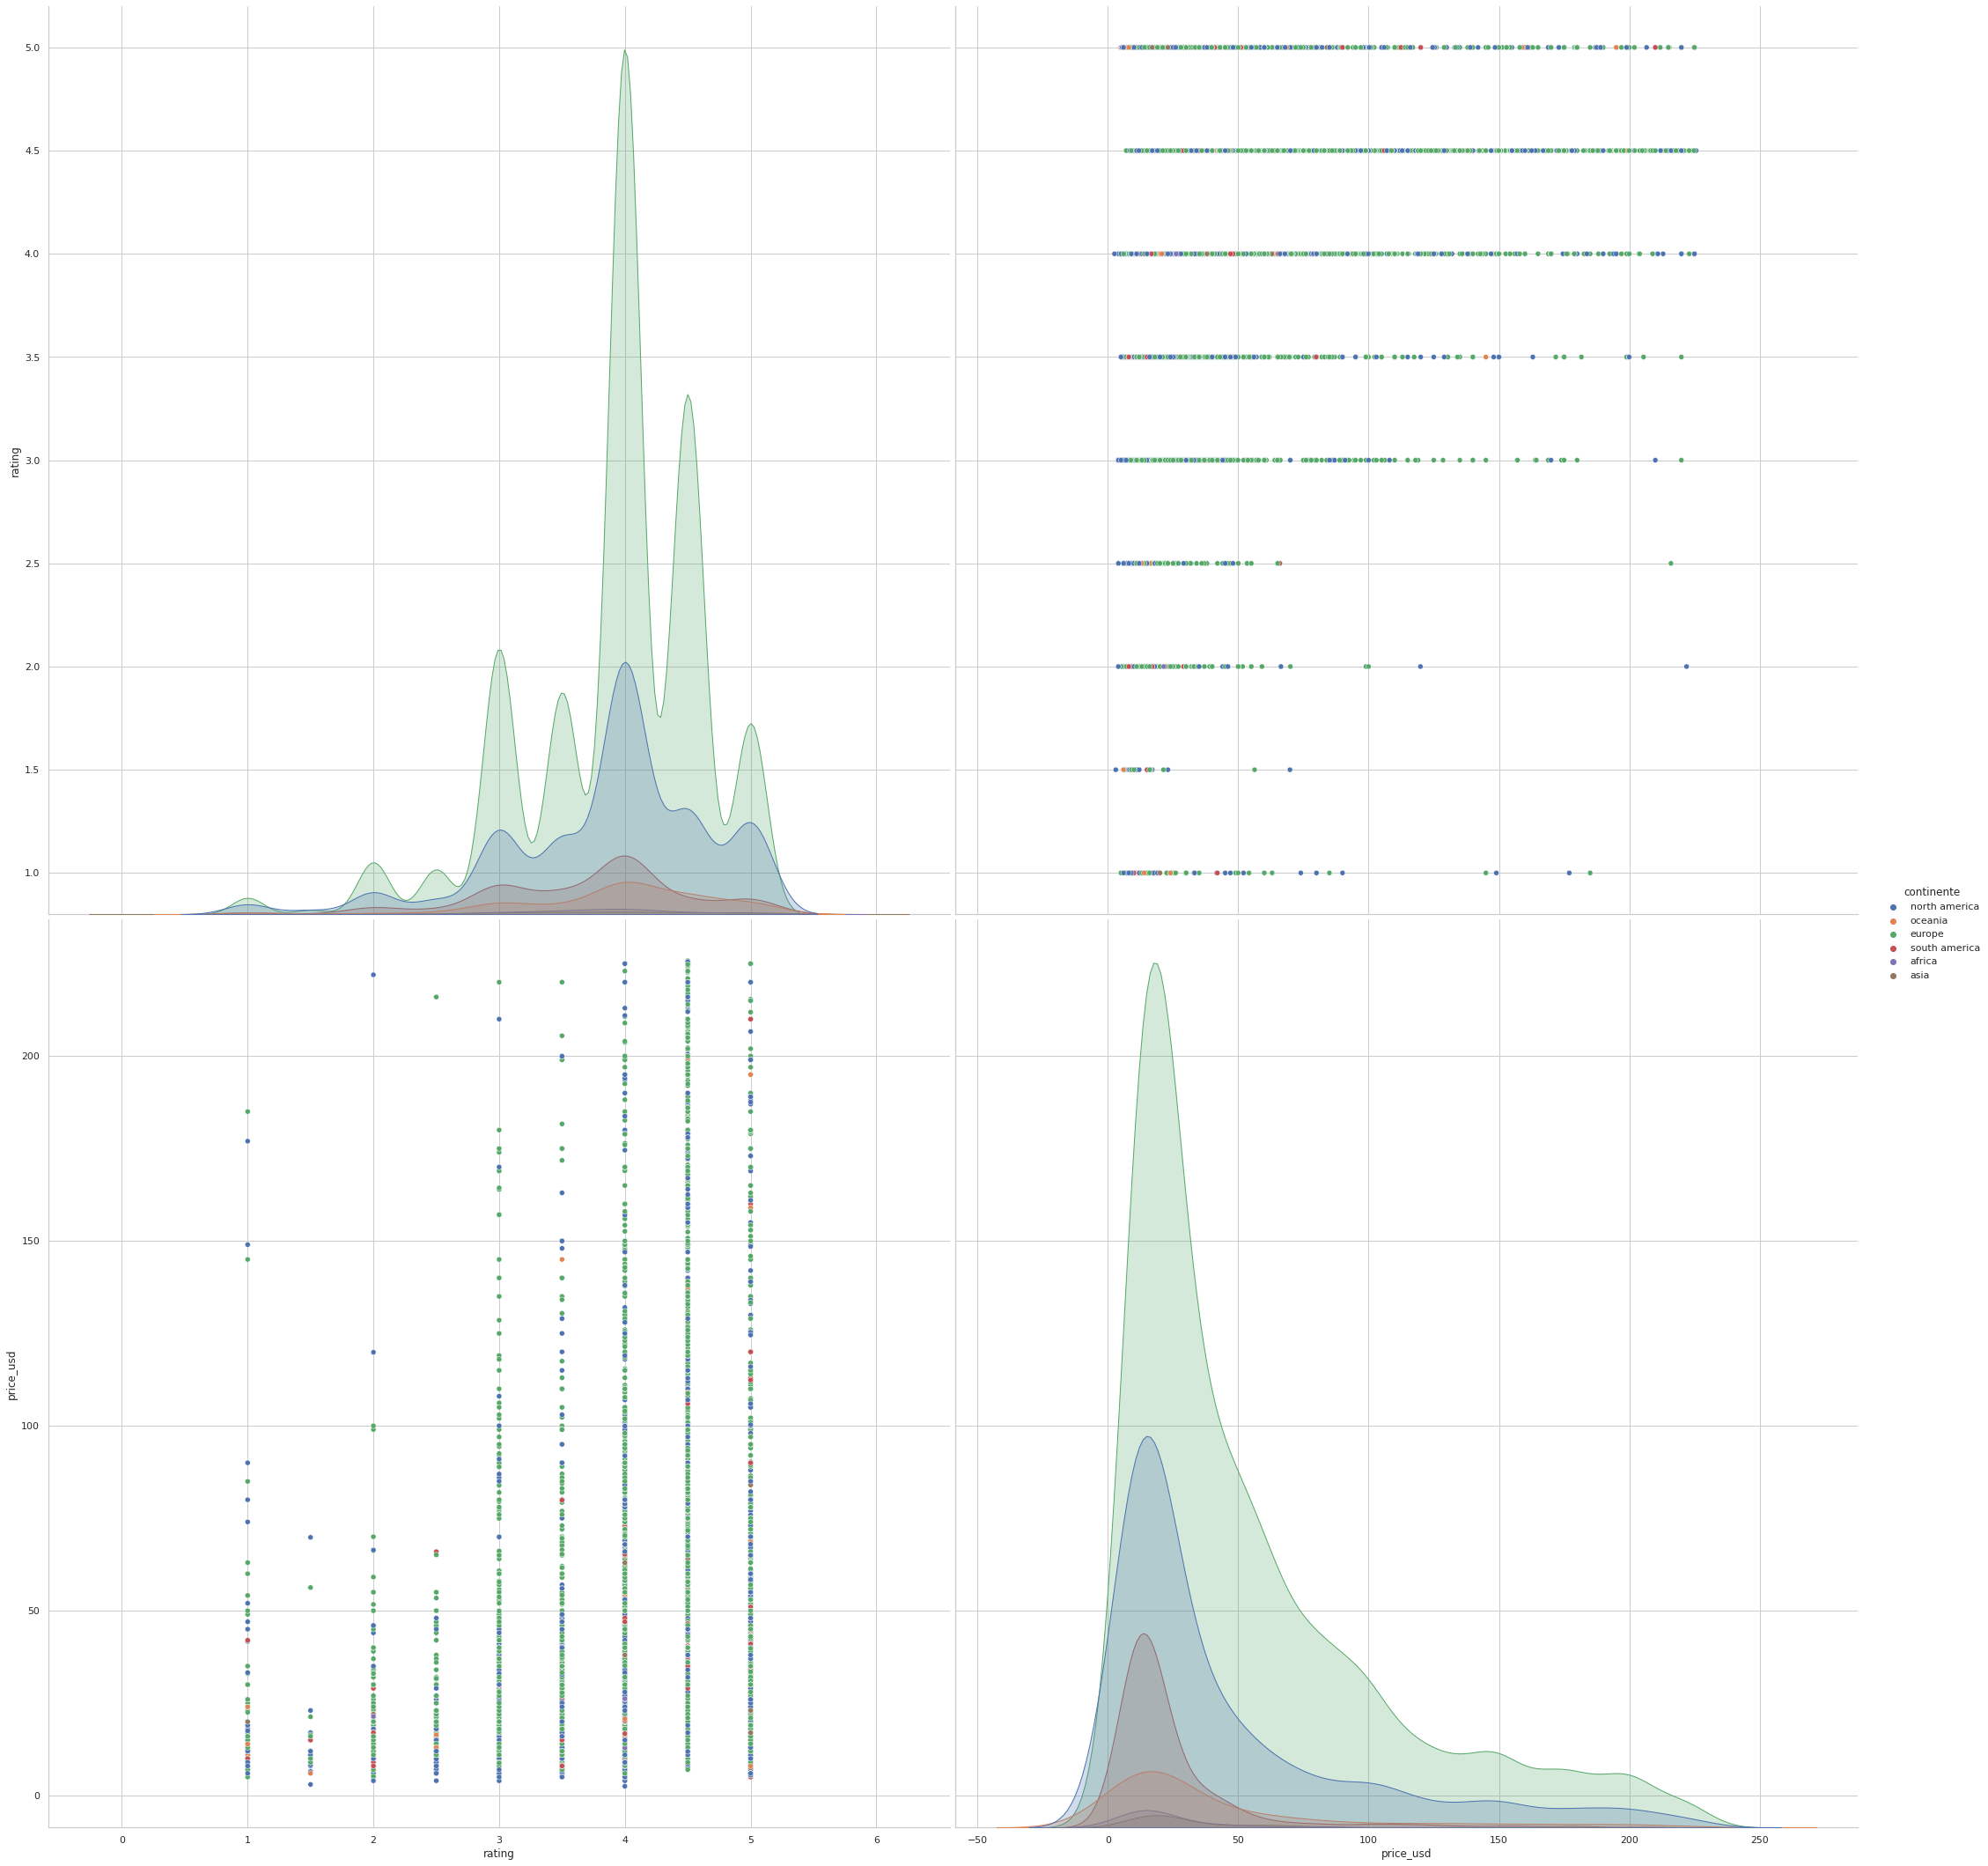

In [ ]:
sns.set_theme(style="whitegrid")

sns.pairplot(df, hue="continente", size = 15)

Vemos que la dispersión de los valores entre continentes es muy distinta. 

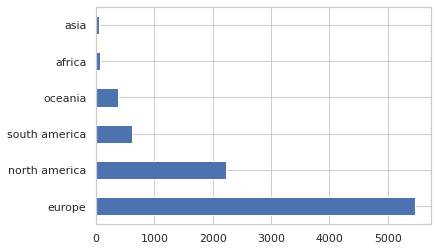

In [ ]:
df['continente'].value_counts().plot(kind = 'barh')

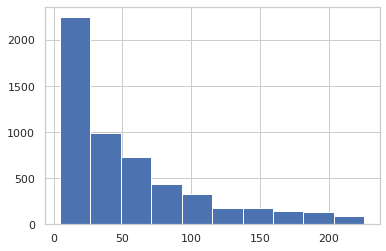

In [ ]:
df[df['continente']== 'europe']['price_usd'].hist()

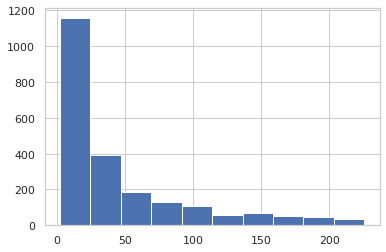

In [ ]:
df[df['continente']== 'north america']['price_usd'].hist()

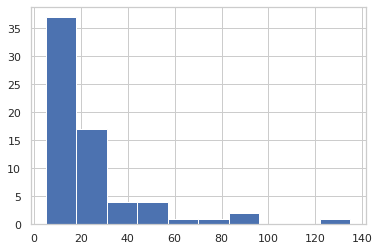

In [ ]:
df[df['continente']== 'africa']['price_usd'].hist()

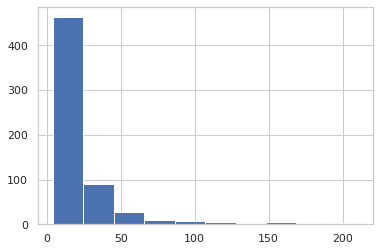

In [ ]:
df[df['continente']== 'south america']['price_usd'].hist()

Filtramos sólo los datos de Europa, ya que su distribución es muy distinta. 

In [ ]:
df = df[df.continente == 'europe']

In [ ]:
df['price_cat'] = pd.cut(df['price_usd'], bins=[0,18,50, upper_range], labels= ['bajo', 'medio', 'alto'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.price_cat.value_counts().to_frame()

,price_cat
alto,2086
medio,1907
bajo,1469


In [ ]:
df.to_csv('/content/drive/MyDrive/TFM_Máster BDDS/datawine/df_clean_europe_nooutliers.csv', index=False)